<a href="https://colab.research.google.com/github/bhaarath-M/python_task/blob/main/assignment_by_showtime_consulting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Exploratory Data Analysis on Facebook Utilization Data


In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [134]:
data=pd.read_excel("/content/facebook user data.xlsx")
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [135]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [136]:
data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [137]:
data["age"].value_counts()

18     5196
23     4404
19     4391
20     3769
21     3671
       ... 
87       42
112      18
111      18
110      15
109       9
Name: age, Length: 101, dtype: int64

In [138]:
data[data.gender.isna()]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
3224,1781137,25,3,1988,1,NaN,203.0,1,1,1,0,1,0,0,0
4123,1110111,31,12,1982,1,NaN,227.0,2,2,0,0,0,0,0,0
5920,2000185,25,15,1988,2,NaN,239.0,4,4,0,0,0,0,0,0
6432,1137054,59,18,1954,2,NaN,2076.0,4,0,23,5,23,4,0,1
6870,1783336,62,5,1951,9,NaN,2047.0,5,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94778,1748557,68,27,1945,4,NaN,1862.0,790,435,422,425,410,318,12,107
95317,2173780,50,11,1963,9,NaN,2129.0,863,389,49,781,24,327,25,454
95479,1442490,108,1,1905,7,NaN,1332.0,967,537,150,1311,76,671,74,640
97530,2119521,74,26,1939,9,NaN,1998.0,1609,348,313,834,179,696,134,138


In [139]:
mode=data.gender.mode()
### A categorical or discrete variable is one that has two or more categories (values)
### gender is a categorical variable having two categories (male and female) with no intrinsic ordering to the categories.
### Mode/median is used to replace the NAN values in the gender column since the column contains categorical values

In [140]:
data["gender"]=data["gender"].replace(np.NAN,mode[0])

In [141]:
data.gender.isna().sum()

0

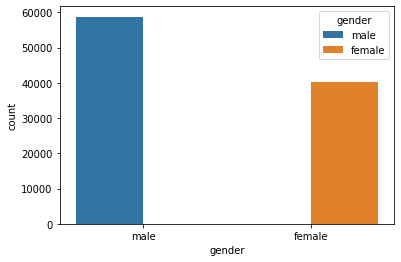

In [142]:
sns.countplot(x="gender",data=data,hue="gender")

In [143]:
data.gender.value_counts()

male      58749
female    40254
Name: gender, dtype: int64

### Number of male users is more than female users.

In [144]:
median=int(data["tenure"].median(skipna=True))
data["tenure"]=data["tenure"].replace(np.NAN,median)
### A numerical variable is a variable where the measurement or number has a numerical meaning
### median is used to replace the NAN values in the tenure column since the column contains numeric variable.

In [145]:
data.isna().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

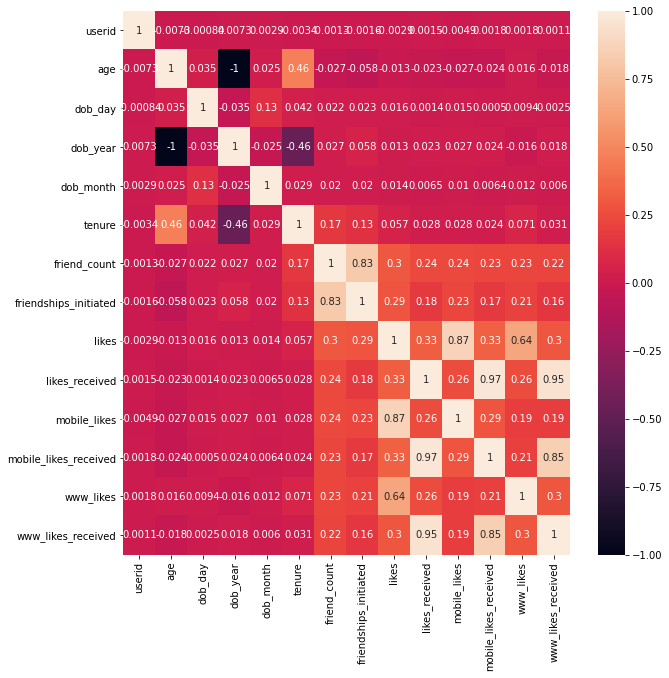

In [146]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)


In [147]:
data.groupby("gender").sum()["friend_count"].reset_index()

,gender,friend_count
0,female,9740258
1,male,9699059


### **Female users has more friends compared to male users**.

In [148]:
data.groupby("gender").sum()["friendships_initiated"].reset_index()

,gender,friendships_initiated
0,female,4584894
1,male,6053223


### **Male users initiated more friendships than female**.

### How many users have no friends?

### With respect to gender i have seperated the users who have no friends.

In [149]:
x=(data[data.gender=="male"].friend_count==0).sum()

In [150]:
y=(data[data.gender=="female"].friend_count==0).sum()

In [151]:
users_with_no_friends=x+y
users_with_no_friends

1962

### **Total of 1962 users have no friends**.

### Users who do not like any posts?

In [152]:
(data[data.gender=="male"].likes==0).sum()

16719

In [153]:
(data[data.gender=="female"].likes==0).sum()

5589

### **22,308 users do not like any posts**.

### How many users did not receive any likes?


In [154]:
(data[data.gender=="male"].likes_received==0).sum()

18188

In [155]:
(data[data.gender=="female"].likes_received==0).sum()

6240

### **24,428 users did not receive any likes**.

### avg number of post liked by the user based on gender.

In [156]:
round((data[data.gender=="male"].sum()["mobile_likes"])/len(data[data.gender=="male"]))

60

In [157]:
round((data[data.gender=="female"].sum()["www_likes"])/len(data[data.gender=="female"]))

87

### avg number of likes received by users based on gender.


In [158]:
round((data[data.gender=="male"].sum()["mobile_likes_received"])/len(data[data.gender=="male"]))

41

In [159]:
round((data[data.gender=="female"].sum()["www_likes_received"])/len(data[data.gender=="female"]))

104